# Data Visualization Ethics Challenge

In this activity, you’ll work with a simple dataset and examine two deliberately bad charts.  
Each one ignores multiple best practices for ethical and effective visualization.

Your job is to:

1. Review each chart and note at least three issues you see.  
2. Create a new chart (or charts) that present the data clearly, accurately, and honestly.  
3. Include clear labels, a cited data source, and a descriptive but neutral title.

**Remember:** Strong visualizations tell the truth, provide context, and avoid design choices that distort or mislead.


## Step 1: Load the dataset

We’re using a provided CSV file with fictional sales data for a coffee chain.  
No need to modify anything in this cell — just run it so the dataset loads into your notebook.  
Once loaded, take a quick look at the first few rows to get familiar with the columns and values.


In [107]:
import pandas as pd
import matplotlib.pyplot as plt

coffee_df = pd.read_csv("fake_coffee_chain_sales.csv")
coffee_df.head()

,Year,Month,Region,Category,Sales,Profit
0,2020,January,East,Espresso,14724,5290.46
1,2020,January,East,Lattes,11948,4138.77
2,2020,January,East,Tea,18660,5959.44
3,2020,January,East,Pastries,11265,2604.46
4,2020,January,East,Beans,8954,2613.22


## Step 2: Review the BAD Charts

Below are two deliberately poor visualizations.  
Your task: Carefully review each and take notes on what you think is wrong, misleading, or just poorly designed.  
Think about chart type, colors, scales, labeling, and whether the chart tells the truth.  


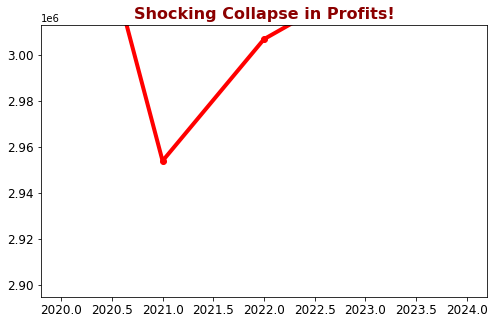

In [108]:
plt.figure(figsize=(8,5))
subset = coffee_df.groupby("Year")["Sales"].sum().reset_index()

# Wrong variable for title, truncated y-axis, misleading color & framing
plt.plot(subset["Year"], subset["Sales"], color="red", linewidth=4, marker="o")
plt.ylim(subset["Sales"].min() * 0.98, subset["Sales"].min() * 1.02)  # extreme truncation
plt.title("Shocking Collapse in Profits!", fontsize=16, fontweight="bold", color="darkred")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


### Write your notes about bad chart #1 here:
(double click to open this markdown cell and type into it)

- Axis not labeled
- X axis: confusing timeline with .5 for years, 
- Y axis: Does not start at 0 and ends before seeing entire trend line
- Trend line is cut off
- Title does not explain the cause, solution, or takeaway

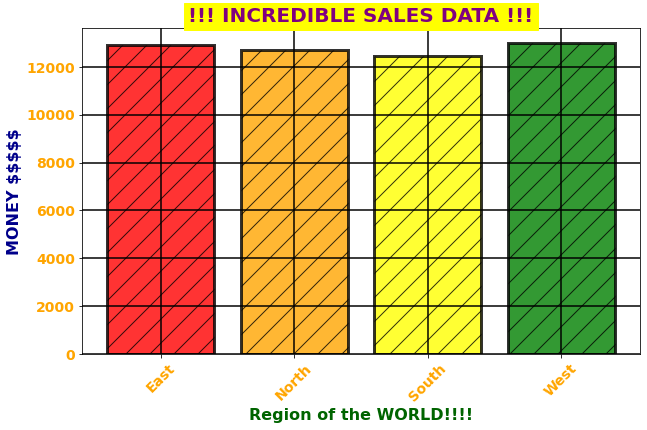

In [109]:
plt.figure(figsize=(10,6))
avg_sales = coffee_df.groupby("Region")["Sales"].mean().reset_index()

colors = ["red","orange","yellow","green","blue","purple"]

plt.bar(avg_sales["Region"], avg_sales["Sales"], 
        color=colors, edgecolor="black", linewidth=3, hatch="/", alpha=0.8)
plt.title("!!! INCREDIBLE SALES DATA !!!", fontsize=20, fontweight="bold", color="purple", backgroundcolor="yellow")
plt.grid(True, which='both', color='black', linestyle='-', linewidth=1.5)
plt.xlabel("Region of the WORLD!!!!", fontsize=16, fontweight="bold", color="darkgreen")
plt.ylabel("MONEY $$$$$", fontsize=16, fontweight="bold", color="darkblue")
plt.xticks(rotation=45, fontsize=14, fontweight="bold", color="orange")
plt.yticks(fontsize=14, fontweight="bold", color="orange")
plt.show()


### Write your notes about bad chart #2 here:
(double click to open this markdown cell and type into it)

- Title does not give context to what the bar chart is communicating
- X Axis: Does not communicate what the region means geographically
- Y Axis: Blue text has low contrast against black. "Money" does not communicate what the value is. Is it sales? Money found on the street?
- The lines and styling are hard to read. Different colors. Title with a yellow background, exclamation points increase the visual cognitive load for a user to discern what is important.
- Bar chart doesn't seem like the right type to communicate sales change over time

## Step 3: Your Turn – Make It Right

Now it’s your turn to fix things.  

- Start by thinking about a question you want to answer with this dataset.  
- Choose a visualization type that matches your question and the data structure.  
- Apply the best practices from our lessons: clear labeling, appropriate scale, purposeful color, simplicity, and accessibility.  
- Be honest - don’t manipulate the chart to make a point that the data doesn’t support.  

When you’re done, add your chart(s) below. You may create more than one if it helps tell the story better.  


In [110]:
# Your GOOD visualization(s) here

### Chart 1 - Reimagining

Changes
- Added tight layout to size accurately
- Adjusted ylim to get line in the middle of the chart so that it will display the change over time better
- Added relevant title and labeling to communicate the timeline measurement better
- Changed line with text for added context for the user
- Changed color of the line to be softer and less harsh on the eye letting the user think about the insight and trend more quickly

- Q: how to get the text to not start directly on the line? Padding?

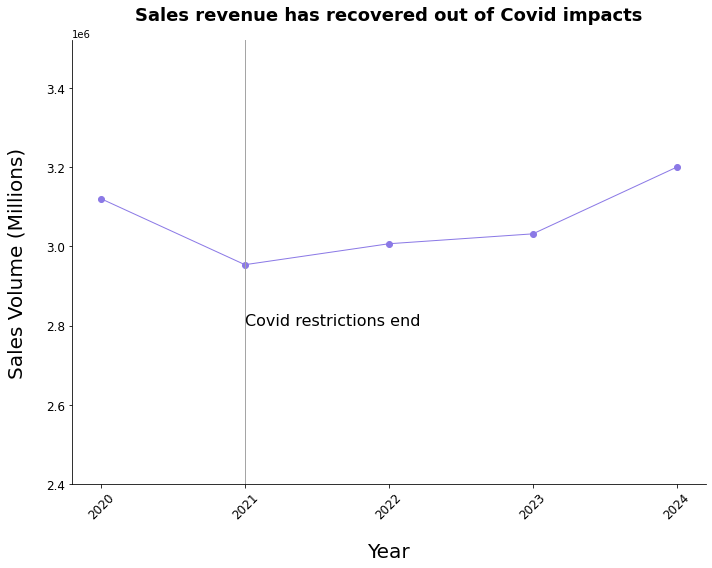

In [114]:
plt.figure(figsize=(10,8))
subset = coffee_df.groupby("Year")["Sales"].sum().reset_index()

plt.plot(subset["Year"], subset["Sales"], color="#8B79E6", linewidth=1, marker="o")
plt.title("Sales revenue has recovered out of Covid impacts", fontsize=18, fontweight="bold", color="black", pad=20)

plt.xlabel("Year", fontsize=20, labelpad=20)
plt.ylabel("Sales Volume (Millions)", fontsize=20, labelpad=20)

plt.xticks(subset["Year"], rotation=45, fontsize=12)
plt.ylim(2400000, subset["Sales"].max() * 1.1)
plt.yticks(fontsize=12)

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")

ax.axvline(
    2021,
    color = "#A5A5A5",
    linewidth = "1",
    )

ax.text(
    2021,
    2800000,
    "Covid restrictions end",
    color = "#000000",
    fontsize = 16
)

plt.tight_layout()
plt.show()

### Chart 2 - Reimagining

Changes
- Added tight layout for better alignments and sizing
- Adjusted BG for better contrast and reading
- Adjusted grid for easier alignment of levels
- Styled labels, removing distracting colors and fontweight
- Q: How to make Y axis shortened and formatted to '$12K'?
- Q: How to add the real sales value to the bars? They are too close together to see significant difference

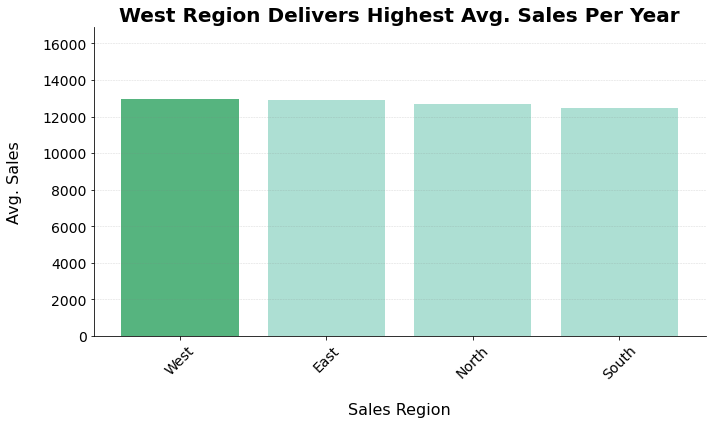

In [112]:
plt.figure(figsize=(10,6), facecolor='white')

avg_sales = coffee_df.groupby("Region")["Sales"].mean().reset_index()
avg_sales = avg_sales.sort_values("Sales", ascending=False)

colors = ["#2ca25f","#99d8c9","#99d8c9","#99d8c9","#99d8c9","#99d8c9"]

plt.bar(avg_sales["Region"], avg_sales["Sales"], 
        color=colors, alpha=0.8)
plt.title("West Region Delivers Highest Avg. Sales Per Year", fontsize=20, fontweight="bold", color="black")
plt.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5, color='gray')

plt.xlabel("Sales Region", fontsize=16, color="#000000", labelpad=20)
plt.ylabel("Avg. Sales", fontsize=16, color="#000000", labelpad=20)
plt.ylim(0, avg_sales["Sales"].max() * 1.3)

plt.xticks(rotation=45, fontsize=14, color="#000000")
plt.yticks(fontsize=14, color="#000000")

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")

plt.tight_layout()
plt.show()